In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import cv2
from scipy.stats import multivariate_normal

In [2]:
def media(I):
    ch = I.shape[2]
    med=np.zeros(ch,)
    for i in range(ch):
        med[i]=np.mean(I[:,:,i].ravel())
    return med

In [3]:
def mcov(I):
    nx,ny,ch = I.shape
    It=np.zeros((ch,nx*ny))
    for i in range(ch):
        It[i,:]=I[:,:,i].ravel()
    cova=np.cov(It)
    return cova

In [4]:
def mcovi(I,sx,sy):
    I=I.astype(np.float)
    nx,ny,ch = I.shape
    It=np.zeros((ch,len(sx)))
    for i in range(ch):
        It[i,:]=I[sx,sy,i].ravel()
    cova=np.cov(It)
    return cova

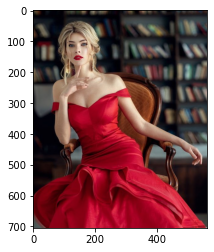

In [5]:
I = cv2.imread('imcolor3.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I,cmap='gray')
nx,ny,ch = I.shape

In [6]:
nm=4
phi=np.ones([nm,])/nm
med=np.zeros((nm,ch))
mc=np.zeros((nm,ch,ch))
for i in range(nm):
    roi=cv2.selectROI('sel',I)
    cv2.destroyWindow('sel')
    Iroi=I[int(roi[1]):int(roi[1]+roi[3]),int(roi[0]):int(roi[0]+roi[2]),:]
    fig=plt.figure(figsize = (3,3))
    plt.imshow(Iroi)
    med[i,:]=media(Iroi)
    mc[i,:,:]=mcov(Iroi)
medr=med 
mcovr=mcov
# print(med)
# print(mc)

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


[[155.227107    11.87436417  33.89181182]
 [ 35.50875672  35.16829933  38.5646709 ]
 [ 86.83082878  39.26450423  23.50685074]
 [128.88064582 103.48724573  89.98057923]]
___________
[[155.22545058  11.87499703  33.8917948 ]
 [ 35.47216978  35.13100276  38.53157173]
 [ 86.89702166  39.28710712  23.5040118 ]
 [128.76512564 103.40939669  89.92490924]]
___________
[[155.22339087  11.87584374  33.89186947]
 [ 35.43978445  35.09751475  38.50198161]
 [ 86.95991957  39.30955834  23.50347096]
 [128.66472227 103.34326457  89.87744662]]
___________
[[155.22186596  11.87647439  33.89194237]
 [ 35.4083909   35.0641522   38.47178632]
 [ 87.01615364  39.32830068  23.50205058]
 [128.57448013 103.28471751  89.83640515]]
___________
[[155.22093735  11.8767251   33.89189476]
 [ 35.38152277  35.03548728  38.44587314]
 [ 87.06439707  39.34549872  23.50217686]
 [128.49803801 103.23434949  89.80105114]]
___________
[[155.21988057  11.87699372  33.89182329]
 [ 35.35648968  35.00849166  38.42131295]
 [ 87.11150

<function matplotlib.pyplot.show(close=None, block=None)>

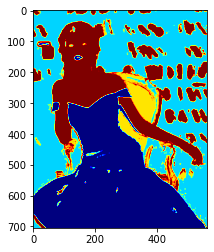

In [28]:
med=medr  
mcov=mcovr
print(med)
print("___________")

lon=nx*ny
pdf=np.zeros((nm,lon))             
It=np.zeros((lon,ch))
for i in range(ch):
    It[:,i]=I[:,:,i].ravel()
It=It.astype(np.float)
pdf=np.zeros((lon,nm))

for ite in range(30):
    for model in range(nm):
        pdf[:,model]=phi[model]*multivariate_normal.pdf(It[:,:], mean=med[model,:] , cov=mc[model,:,:]) 
    pdf=np.nan_to_num(pdf)
    pdft=np.sum(pdf,axis=1)
    gamma=pdf.T/pdft
    gamma=np.nan_to_num(gamma)
    
    for j in range(nm):
        temp=np.reshape(gamma[model,:],(nx,ny))
        gamma[model,:]=cv2.blur(temp,(7, 7)).ravel()
        #gamma[model,:]=cv2.GaussianBlur(temp,(15,15),cv2.BORDER_DEFAULT).ravel()
    assign=np.argmax(gamma,axis=0)
    for model in range(nm):
        suma=np.sum(gamma[model,:])
        phi[model]=suma/lon
        classt=np.where(assign==model)
        classt=classt[0]
        sx,sy=np.unravel_index(classt, (nx,ny))
        for i in range(ch):
            med[model,i]=np.dot(gamma[model,:],It[:,i])/suma
        mc[model,:,:]=mcovi(I,sx,sy)
    print(med)
    print("___________")
for model in range(nm):
    pdf[:,model]=phi[model]*multivariate_normal.pdf(It[:,:], mean=med[model,:] , cov=mc[model,:,:]) 
pdf=np.nan_to_num(pdf)
pdft=np.sum(pdf,axis=1)
gamma=pdf.T/pdft
gamma=np.nan_to_num(gamma)
for j in range(nm):
    temp=np.reshape(gamma[model,:],(nx,ny))
    gamma[model,:]=cv2.blur(temp,(13,13)).ravel()
assign=np.argmax(gamma,axis=0)
assign=np.reshape(assign,(nx,ny))
plt.imshow(assign,cmap='jet')
plt.show

[155.21810216  11.88328763  33.89609196]


<function matplotlib.pyplot.show(close=None, block=None)>

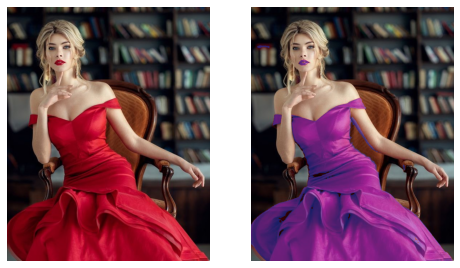

In [29]:
change=0
print(med[change,:])
assign=np.argmax(gamma,axis=0)
classt=np.where(assign==change)
classt=classt[0]
sx,sy=np.unravel_index(classt, (nx,ny))
It=np.copy(I)
for i in range(len(sx)):
    It[sx[i],sy[i],0]=It[sx[i],sy[i],0]-30
    It[sx[i],sy[i],1]=It[sx[i],sy[i],1]+30
    It[sx[i],sy[i],2]=It[sx[i],sy[i],2]+100
fig1=plt.figure(figsize = (8,8))
a = fig1.add_subplot(1, 2, 1)
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

b = fig1.add_subplot(1, 2, 2)
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off');
plt.imshow(It,cmap='gray')
plt.show
